In [1]:
# reload modules without reloading explicitly
import importlib
%load_ext autoreload
%autoreload 2

In [2]:
#specify ""matplotlib notebook"" for resizeable inline plots:
# works in jupyter notebook
%matplotlib notebook 
# works in vs code; may need to ""pip install ipympl""
#%matplotlib widget
import os
from pathlib import Path
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume as ipv
import sklearn.decomposition

In [19]:
# try pca on a synthetic, toy 3D image
# keep in mind that point of PCA is to reduce dimensionality
# VAR(R[2,:]) is smaller than others
# (so this is a thin disk)
# 
#R = np.eye(2)
NPOINTS=5000
R = np.zeros((3, NPOINTS))
R[0,:] = np.random.normal(loc=0.0, scale=0.75, size=(NPOINTS,))
R[1,:] = np.random.normal(loc=0.0, scale=0.75, size=(NPOINTS,))
R[2,:] = np.random.normal(loc=0.0, scale=0.05, size=(NPOINTS,))


#R = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print(R.shape)

ipv.quickscatter(R[0,:],R[1,:],R[2,:], size=1, marker="sphere")


(3, 5000)


In [20]:

r_rank = np.linalg.matrix_rank(R)
print(r_rank)

3


In [21]:
#
# fit PCA model to R
# IMPORTANT: shape MUST be samples x dimensions
#
pca = sklearn.decomposition.PCA(n_components = r_rank-1)
pca.fit(R.transpose())

print(pca.n_components_)
print(pca.n_features_)
print(pca.n_samples_)
print(pca.components_.shape)
print(pca.explained_variance_)
print(np.dot(pca.components_[0,:], pca.components_[1,:]))

2
3
5000
(2, 3)
[0.56964723 0.56567148]
5.551115123125783e-17


In [22]:
#
# pca.transform transforms 3D data into 2D data 
#
Rt = pca.transform(R.transpose())
print(Rt.shape)


(5000, 2)


<IPython.core.display.Javascript object>


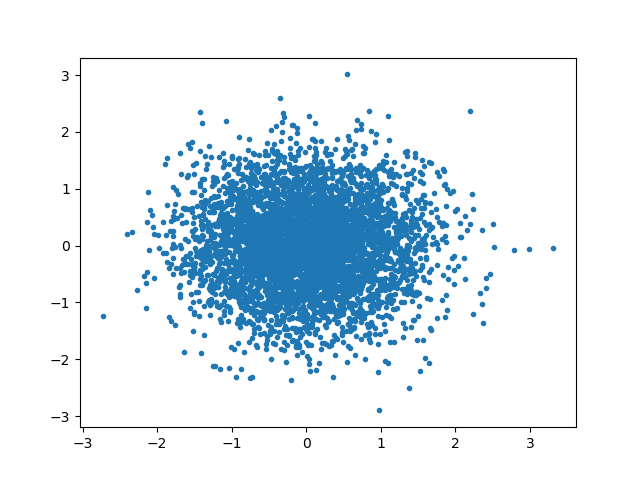

In [24]:
#
# plot 2D shape (3rd dimension is eliminated via projection to plane)
fig,ax=plt.subplots()
ax.plot(Rt[:,0],Rt[:,1],'.')
plt.show()